In [1]:
# Import necessary libraries:

import numpy as np
import pandas as pd
import copy

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

from scipy import interp

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

#### Read the input file and store it in ger_credit_df

In [2]:
ger_credit_df = pd.read_csv('german_credit.csv')

#### Check the shape of dataframe:

In [3]:
ger_credit_df.shape

(1000, 21)

**Inference**

    Data has 1000 rows and 21 columns

#### Check first few records of data:

In [4]:
ger_credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


#### Check the data distribution:

In [5]:
ger_credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


#### Check for missing values:

In [6]:
ger_credit_df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

**Inference:**
    
    No missing values. We are good to proceed

#### Check the datatype of columns:

In [7]:
ger_credit_df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [8]:
ger_credit_df.dtypes.value_counts()

object    13
int64      8
dtype: int64

**Inference**

    Most of the columns are of type object. We will need to encode them into numeric values.

#### Check the data split up based on target column:

In [9]:
ger_credit_df['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

**Inference:**
    
    Data has more population in non-defaulters when compared to defaulters. So naturally the model will do a better job in         predicting the non-defaulters compared to defaulters

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

#### Select only 50% of data for this use case:

In [10]:
data, data_val = train_test_split(ger_credit_df, test_size = 0.5, random_state = 7)

In [11]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [12]:
# Print Shape of model data

data.shape

(500, 21)

#### Encode categorical columns using get_dummies:

In [13]:
data_corr = pd.get_dummies(data, prefix_sep=':')  

**Note:**
    
    I'm not using drop_first=True now, since we need to check the correlation between features. I don't prefer losing               columns before that check. However, I will use drop_first=True before building the model

#### Extract the independent variables for checking the correlation between them:

In [14]:
ind_vars_corr = data_corr.drop('default',axis=1)

#### Check the shape of data after encoding:

In [15]:
ind_vars_corr.shape

(500, 61)

**Inference:**

    Encoded data after 50% split has 500 rows and 61 columns. This doesn't include the target column

### Check for highly correlated variables but don't required any treatment for this use case

#### Let's look at the correlation now:

In [16]:
pd.options.display.max_rows = 70
pd.options.display.max_columns = 70

# Gets the upper triangle in the correlation matrix
corr_mat = pd.DataFrame(np.triu(ind_vars_corr.corr().abs(), k=1))  # Values on diagonal (which is 1 here) and below the diagonal
                                                                   # would be converted to 0

# Rename index and columns of the correlation matrix
corr_mat = corr_mat.rename(index=dict(zip(corr_mat.columns, ind_vars_corr.columns)),
                           columns=dict(zip(corr_mat.columns, ind_vars_corr.columns)))

#### Check for highly correlated features:

In [17]:
# Create an empty dataframe to store the highly correlated features and their values:
corr_mat_max = pd.DataFrame()

# Get the highly correlated columns and their values:
corr_mat_max['Correlated with'] = corr_mat.idxmax()
corr_mat_max['Max corr value'] = corr_mat.max()

# Sort the dataframe descending to get highly correlated features on top:
corr_mat_max.sort_values(by='Max corr value',ascending=False).head(5)

,Correlated with,Max corr value
foreign_worker:yes,foreign_worker:no,1.000000
"telephone:yes, registered under the customers name",telephone:none,1.000000
other_installment_plans:none,other_installment_plans:bank,0.846805
housing:for free,property:unknown / no property,0.808156
housing:rent,housing:own,0.725358


**Inference**
    
    These correlations can be in positive or negative way, as we are only bothered about the strength of correlations
    
    - As observed, foreign_worker: yes and no, has the highest correlation, obviously it is a strong negative correlation
    - Similarly, telephone: yes and no has a stong negative correlation
    - other_installment_plan:banks and none are highly correlated
    - Property (unknown/no property) and housing (for free) has a strong correlation
    - Housing own and rent has a strong correlation

#### Check for least correlated variables:

In [18]:
# Create an empty dataframe to store the least correlated features and their values:
corr_mat_min = pd.DataFrame()

# Since we are only dealing with the upper triangular correlation matrix, the lower values would be 0. We should not 
# consider these zeroes while finding the least correlation
corr_mat_min['Correlated with'] = corr_mat[corr_mat > 0].idxmin()
corr_mat_min['Min corr value'] = corr_mat[corr_mat > 0].min()

# Sort the dataframe ascending to get the less correlated features on top:
corr_mat_min.sort_values(by='Min corr value').head(5)

,Correlated with,Min corr value
housing:own,personal_status_sex:male : married/widowed,1.019555e-17
job:unskilled - resident,savings:.. >= 1000 DM,4.367641e-17
savings:... < 100 DM,credit_history:delay in paying off in the past,9.079623e-05
purpose:education,age,1.126019e-04
purpose:radio/television,credit_history:all credits at this bank paid b...,1.829607e-04


**Inference**

    - As observed, personal_status_sex and housing has the least correlation
    - Followed by savings (>= 1000DM) and job (unskilled)
    - Credit history (delay in paying) and savings (< 100 DM) are correlated less

#### Check for correlation with target:

In [19]:
corr_with_target = pd.DataFrame(data_corr.corr().abs().loc['default'])
corr_with_target.drop('default',axis=0,inplace=True) # Drop target as we know self correlation would be 1
corr_with_target.rename(columns={'default': 'Corr value'}, inplace=True)

corr_with_target.sort_values(by='Corr value',ascending=False)

,Corr value
account_check_status:no checking account,0.325050
duration_in_month,0.259089
account_check_status:< 0 DM,0.245368
credit_amount,0.218535
credit_history:critical account/ other credits existing (not at this bank),0.179608
housing:own,0.158921
property:real estate,0.150162
purpose:(vacation - does not exist?),0.149010
savings:... < 100 DM,0.147265
purpose:domestic appliances,0.142107


**Inference:**
    
   **Highly correlated columns with target:** <br>
    account_check_status (no checking account), duration in month, account_check_status (<0 DM), credit_amount &                     credit_history (critical account) are the top 5 features that have the maximum correlation with the target
    
   **Least correlated columns with target:** <br>
    job (skilled employee), credit_history(delay in paying), job (unemployed), people_under_maintenance & present_emp_since (1 <...< 4 years) are the top 5 features that have the least correlation with the target

### Drop the original variables which are converted to dummy

**Inference:** 

    Original categorical variables are already converted into their corresponding dummy variables and they do not exists anymore

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

#### Drop_first row in get_dummies before model building

In [20]:
# I'm dropping first column after get dummies so that some dimensions are reduced and it might give a better model

data_model = pd.get_dummies(data, drop_first=True) 

In [21]:
ind_vars = data_model.drop('default',axis=1)
target_var = data_model['default']

In [22]:
ind_vars.shape

(500, 48)

**Inference**

    Encoded data after using drop_first=True has 500 rows and 48 columns. This doesn't include the target column

#### Split the 50% of the original data into 70:30 train-test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(ind_vars, target_var, test_size = 0.3, random_state = 7)

#### Let's review the number of data points in each of the train & test datasets:

In [24]:
print('\033[1mTrain dataset\033[0m')
print('\033[1m-------------\033[0m')
print('\033[1mIndependent variables: \033[0m', len(X_train))
print('\033[1mTarget variable: \033[0m', len(y_train))

print('\n\033[1mTest dataset\033[0m')
print('\033[1m------------\033[0m')
print('\033[1mIndependent variables: \033[0m', len(X_test))
print('\033[1mTarget variable: \033[0m', len(y_test))

Train dataset
-------------
Independent variables:  350
Target variable:  350

Test dataset
------------
Independent variables:  150
Target variable:  150


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [25]:
#### Build the random forest classifier ensemble model

In [26]:
rf_clf = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=2, random_state=9999)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [27]:
print('\033[1mTraining accuracy: \033[0m', rf_clf.score(X_train, y_train))

Training accuracy:  1.0


**Inference:**
    
    Model has performed an overfit on the training data

In [28]:
# Find out the y_pred:

y_pred = pd.DataFrame(rf_clf.predict(X_test))

In [29]:
print('\033[1mTest accuracy: \033[0m %3.3f' %(accuracy_score(y_test, y_pred)))

Test accuracy:  0.733


#### Build the confusion matrix:

In [30]:
rf_clf_cm = confusion_matrix(y_test, y_pred)
print('\033[1mConfusion matrix :-\033[0m')
rf_clf_cm

Confusion matrix :-


array([[98,  5],
       [35, 12]], dtype=int64)

#### Plotting the confusion matrix for better understanding:

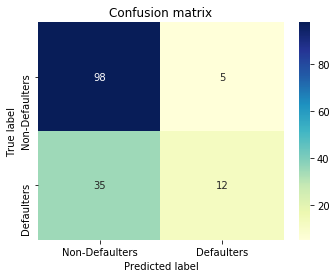

In [31]:
rf_clf_cm = pd.DataFrame(rf_clf_cm,
                  index = ['Non-Defaulters','Defaulters'], 
                  columns = ['Non-Defaulters','Defaulters'])

plt.figure(figsize=(5.5,4))
sns.heatmap(rf_clf_cm, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Analyzing the confusion matrix

True Positives (TP): We correctly predicted 98 non-defaulters as non-defaulters

True Negatives (TN): We correctly predicted 12 defaulters as defaulters

False Positives (FP): We incorrectly predicted 35 defaulters as non-defaulters (a "Type I error")
Falsely predicted positive Type I error

False Negatives (FN): We incorrectly predicted 5 non-defaulters as defaulters (a "Type II error") 
Falsely predicted negative Type II error

#### Classification report

In [32]:
target_names = ['Non-Defaulters', 'Defaulters']
rf_clf_clrpt = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(rf_clf_clrpt)

                precision    recall  f1-score   support

Non-Defaulters       0.74      0.95      0.83       103
    Defaulters       0.71      0.26      0.37        47

     micro avg       0.73      0.73      0.73       150
     macro avg       0.72      0.60      0.60       150
  weighted avg       0.73      0.73      0.69       150



**Inference:**
    
    - Class non-defaulters has a precision and recall of 0.74 & 0.95 with a F1 score of 0.83
    - Class defaulters has a precision and recall of 0.71 & 0.26 with a F1 score of 0.37

#### Plot Receiver Operating Characteristic (ROC) Curve

In [33]:
y_predictprob = rf_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictprob[::,1])

roc_auc = auc(fpr, tpr)
print('\033[1mArea under the ROC curve:\033[0m %3.2f' %(roc_auc)) 

Area under the ROC curve: 0.76


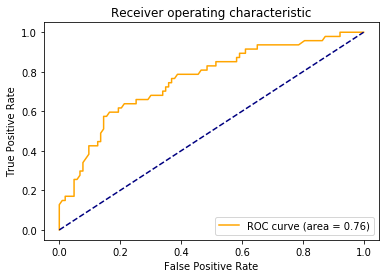

In [34]:
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Q6 Show the list of the features importance( 1 Marks)

In [35]:
## Feature Importance:

feature_imp = pd.DataFrame(rf_clf.feature_importances_,columns=['Importance'],index=X_train.columns)
feature_imp.sort_values(by='Importance', ascending=False)

,Importance
credit_amount,0.125224
duration_in_month,0.092313
age,0.087226
account_check_status_no checking account,0.062103
installment_as_income_perc,0.041379
present_res_since,0.037270
account_check_status_< 0 DM,0.028065
personal_status_sex_male : single,0.024842
other_installment_plans_none,0.022624
credits_this_bank,0.021628


#### Plot the top 5 feature importances for quick view:

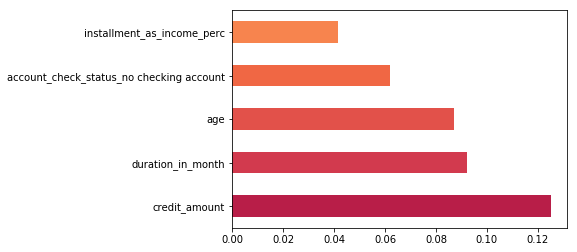

In [36]:
(pd.Series(rf_clf.feature_importances_,index=ind_vars.columns)
   .nlargest(5)
   .plot(kind='barh', color=sns.color_palette('Spectral',20)))       

**Inference:**
    
        - Credit_amount contributes to 12.5% of the model accuracy
        - duration_in_month contributes 9.2%
        - Followed by age which contributes to 8.7%

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

#### Create a new random forest model with all the data (100%)

In [37]:
X = ger_credit_df.drop('default', axis=1)
y = ger_credit_df['default']

In [38]:
# Apply get dummies on X:

X = pd.get_dummies(X, drop_first=True)

In [39]:
# Shape of X:

X.shape

(1000, 48)

**Inference**

    Encoded 100% data after using drop_first=True has 1000 rows and 48 columns. This doesn't include the target column

#### Split the data into 70:30 train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#### Build the new Random forest classifier model

In [41]:
rf_clf_m1 = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=2, random_state=9999)
rf_clf_m1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

#### Train & test accuracy:

In [42]:
print('\033[1mTraining accuracy: \033[0m %3.3f' %(rf_clf_m1.score(X_train, y_train)))
print('\n\033[1mTest accuracy: \033[0m %3.3f' %(rf_clf_m1.score(X_test, y_test)))

Training accuracy:  1.000

Test accuracy:  0.790


### Validate the Random Forest model build above using k fold¶

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [44]:
# Use below values
num_folds = 10
seed = 77

In [45]:
#Validate the Random Forest model build above using k fold - for full (100%) of data

In [46]:
kfold = KFold(n_splits=num_folds,random_state=seed)
cv_results = cross_val_score(rf_clf_m1, X, y, cv=kfold, scoring='accuracy')
cv_results

array([0.87, 0.67, 0.79, 0.81, 0.81, 0.68, 0.75, 0.78, 0.75, 0.76])

#### Calculate Mean score

In [47]:
print('\033[1mMean score of KFold cross validation: \033[0m %3.3f' %(cv_results.mean()))

Mean score of KFold cross validation:  0.767


#### Calculate score standard deviation using std()

In [48]:
print('\033[1mScore standard deviation of KFold cross validation: \033[0m %3.3f' %(cv_results.std()))

Score standard deviation of KFold cross validation:  0.057


# Q8 Print the confusion matrix( 1 Marks)

#### Build the confusion matrix

In [49]:
cv_pred = cross_val_predict(rf_clf_m1, X, y, cv=kfold)
cv_cm = confusion_matrix(y, cv_pred)
print('\033[1mConfusion matrix :-\033[0m')
cv_cm

Confusion matrix :-


array([[649,  51],
       [182, 118]], dtype=int64)

#### Plotting the confusion matrix for better understanding:

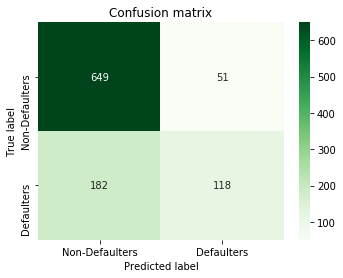

In [50]:
cv_cm = pd.DataFrame(cv_cm,
                  index = ['Non-Defaulters','Defaulters'], 
                  columns = ['Non-Defaulters','Defaulters'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cv_cm, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Analyzing the confusion matrix

True Positives (TP): We correctly predicted 649 non-defaulters as non-defaulters

True Negatives (TN): We correctly predicted 118 defaulters as defaulters

False Positives (FP): We incorrectly predicted 182 defaulters as non-defaulters (a "Type I error")
Falsely predicted positive Type I error

False Negatives (FN): We incorrectly predicted 51 non-defaulters as defaulters (a "Type II error") 
Falsely predicted negative Type II error

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [51]:
target_names = ['Non-Defaulters', 'Defaulters']
cv_clrpt = metrics.classification_report(y, cv_pred, target_names=target_names)
print(cv_clrpt)

                precision    recall  f1-score   support

Non-Defaulters       0.78      0.93      0.85       700
    Defaulters       0.70      0.39      0.50       300

     micro avg       0.77      0.77      0.77      1000
     macro avg       0.74      0.66      0.68      1000
  weighted avg       0.76      0.77      0.74      1000



**Inference:**
    
    - Class non-defaulters has a precision and recall of 0.78 & 0.93 with a F1 score of 0.85
    - Class defaulters has a precision and recall of 0.70 & 0.39 with a F1 score of 0.50

#### Let's look at the defaulters and non-defaulters data in the original dataframe

In [52]:
y.value_counts()

0    700
1    300
Name: default, dtype: int64

**Inference:**
    
    Data has more population in non-defaulters when compared to defaulters. So naturally the model will do a better job in         finding the non-defaulters and hence the f1 score of non-defaulters is higher compared to defaulters

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [53]:
#Hint: Use roc_curve

#### Plotting ROC curve:

In [54]:
y_predictprob = rf_clf_m1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictprob[::,1])

Text(0.5, 1.0, 'Receiver operating characteristic')

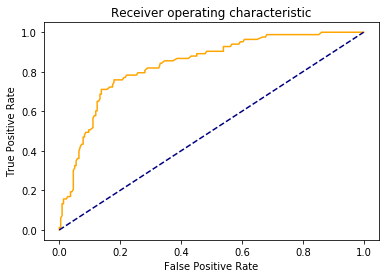

In [55]:
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

#### Calculate Area Under Curve:

In [56]:
roc_auc = auc(fpr, tpr)
print('Area under the ROC curve: %3.2f' %(roc_auc)) 

Area under the ROC curve: 0.84


#### Plotting ROC once again with the AUC:

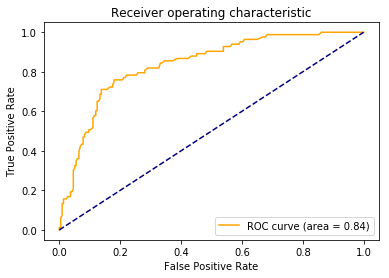

In [57]:
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**Inference:**
    
    AUC is 0.84

#### Plotting the roc for the k-fold validation

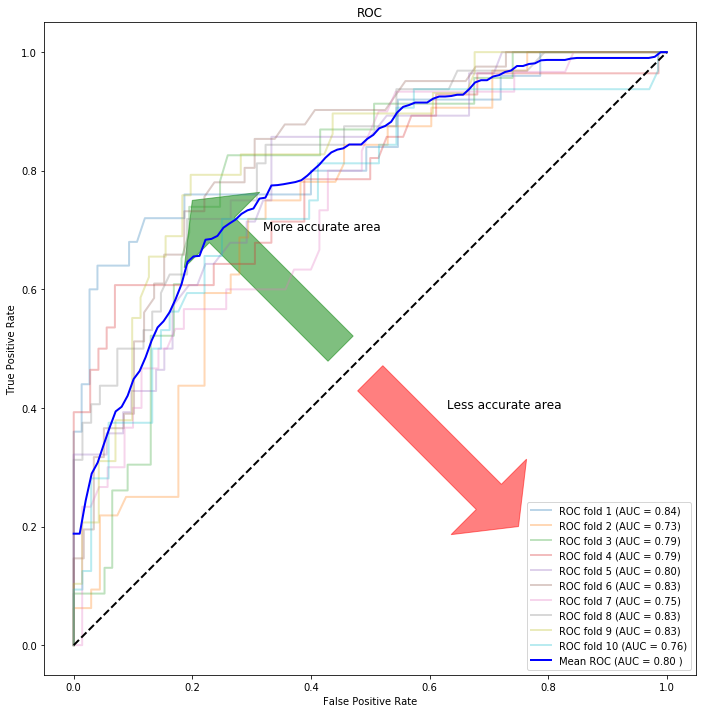

In [58]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in kfold.split(X, y):
    prediction = rf_clf_m1.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

**Inference:**
    
    For the Mean ROC of KFold cross validation, AUC is 0.80

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [59]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [60]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf_clf_m1.fit(X_, y_)
    y_pred = rf_clf_m1.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [61]:
accuracy = np.array(accuracy)
print('\033[1mAccuracy Score\033[0m')
print('\033[1m--------------\033[0m')
print('\033[1mAverage: \033[0m %3.3f' %(accuracy.mean()))
print('\033[1mStandard deviation: \033[0m %3.3f' %(accuracy.std()))

Accuracy Score
--------------
Average:  0.778
Standard deviation:  0.014


### Overall Summary of actions:

**Initial Data Processing:**
- Data was read and was stored in ger_credit_df
- Data didn't have any missing values
- Data had 1000 rows and 21 columns, out of which 13 columns were categorical in nature
- Used get_dummies to convert the categorical columns to numeric

- Randomly selected 50% of original data for the model building
- Correlation was checked between the independent variables. Correlation was also checked between the independent and the target variable. But no features were dropped based on correlation check in this use case

**Random Forest Classifier:**
- 50% of data was split into train and test in 70:30 ratio to build a Random Forest Classifier
- Training accuracy was found to be 1.0 proving it to be an overfit
- Test accuracy was found to be 0.73
- Confusion matrix, Classification_report, ROC-AUC curve were plotted

- Features were listed based on their importance

**KFold Cross Validation:**
- Random Forest Classifier was build again, with the whole of data (100%)
- This data was split into 70:30 and was fed into model
- Training accuracy was found to be 1.0
- Test accuracy was found to be 0.79

- Validated this model with KFold cross validation method
- Used KFold to create 10 random folds to crossvalidate our model using different sets of data
- The mean score of KFold cross validation was found to be 0.77 with a standard deviation of 0.06. i.e., the model is expected to give 77% of accuracy +/- the standard deviation of 0.06
- Confusion matrix, Classification_report, ROC-AUC curve were plotted 

- Random Forest model was created with Bootstrapping sampling whose average accuracy was found to be 0.78 with a standard deviation of 0.01




### <center> End of R4 External Lab </center>